Документация fastai - https://docs.fast.ai/

Quick start - https://docs.fast.ai/quick_start.html

Для оптимальной скорости обучения нейронной сети стоит подключиться к GPU серверу

Приведенный ниже код выполняет следующие действия:

1. Набор данных под названием Oxford-IIIT Pet Dataset, содержащий 7349 изображений кошек и собак 37 различных пород, будет загружен с сайта fast.ai наборы данных собираются на сервере GPU, который вы используете, и затем будут извлечены.

2. Предварительно подготовленная модель, которая уже была обучена на 1,3 миллионах изображений, победившая в конкурсе, будет загружена из Интернета.

3. Предварительно обученная модель будет преобразована и точно настроена (fine tune) с использованием последних достижений в области трансферного обучения, чтобы создать модель, специально адаптированную для распознавания собак и кошек.

Первые два шага нужно выполнить только один раз. Если вы запустите его снова, он будет использовать набор данных и модель, которые уже были загружены, вместо того, чтобы загружать их снова.

In [ ]:
from fastai.vision.all import *
from google.colab import files
from io import BytesIO

In [ ]:
path = untar_data(URLs.PETS)/'images' # Загружаем изображения и сохраняем путь к ним

def is_cat(x): return x[0].isupper() # Названия изображений с котами начинаются с большой буквы
dls = ImageDataLoaders.from_name_func( # Создаём загрузчик изображений, который будет передавать изображения в нейронную сеть для обучения
    path, # Путь к данным
    get_image_files(path), # Откуда взять изображения
    valid_pct=0.2, seed=42, # Параметры для обучения
    label_func=is_cat, # Как отличить изображение кота и собаки (целевая метка)
    item_tfms=Resize(224)) # Преобразуем все изображения к одному размеру 224x224
    # Желательно, чтобы размер изображения был кратен 32

 # Создаём learner - объект позволяющий работать с нейронными сетями, передаём ему загрузчик данных, метрику (функцию считающую процент ошибок) и нейросеть resnet34

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1) # Обучаем нейронную сеть

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 146MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.175200,0.026692,0.008119,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.072420,0.030137,0.008119,00:51


Saving cat.png to cat.png


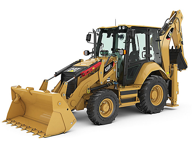

In [ ]:
uploaded = files.upload() # Загрузка файла
img = Image.open(BytesIO(list(uploaded.values())[0])) # Открываем изображение
img.to_thumb(192) # Выводим изображение (Изображения PIL можно выводить таким образом)

In [ ]:
is_cat, _, probs = learn.predict(img) # Предсказывам результат
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000242


В jupyter (в том числе и colab) можно посмотреть содержание переменных

In [ ]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
get_image_files(path) # Возвращает пути к изображениям в списке fastai L

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_36.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_126.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_65.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_30.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_166.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_74.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_33.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_105.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_64.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_108.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_62.j

In [ ]:
probs

tensor([9.9976e-01, 2.4211e-04])

(*) - задания, которые точно стоит выполнить

1. (*) Как можно сохранить модель для последующего использования так, чтобы её можно было загрузить после закрытия данного блокнота?

In [ ]:
# YOUR CODE GOES HERE

2. Попробуйте использовать для обучения модели fit_one_cycle (https://docs.fast.ai/callback.schedule.html#learner.fit_one_cycle). Как изменился результат? Попробуйте улучшить качество обучения модели используя разные способы обучения с различным количеством поколений (n_epoch).


3. Попробуйте использовать другой размер изображения для обучения. Как меняется время обучения и значения метрик? Попробуйте найти оптимальный размер изображения для обучения. Cuda runtime error: out of memory - ошибка нехватки памяти

4. Какая модель использовалась в данном проекте? Найдите в документации какие модели доступны ещё (https://pytorch.org/vision/stable/models.html#classification) и попробуйте использовать их. Что меняется при использовании других моделей?

5. (*) Что делает код ниже? Зачем нужна confusion matrix?

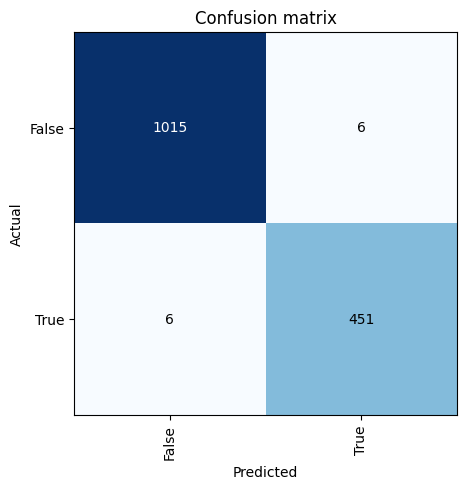

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()



6. (*) Попробуйте проанализировать результаты обучения модели, используя plot_top_losses (https://docs.fast.ai/interpret.html). Почему наибольшие потери именно у этих изображений?

In [ ]:
# YOUR CODE GOES HERE

7. Добавьте аугментацию изображений, применённую следующм образом:

    ImageDataLoaders.from\_label_func(

    ...
    item_tfms=Resize(460),

    batch_tfms=aug_transforms(size=224, min_scale=0.75)

    )

Что изменилось при обучении? Узнайте, как работает данная функция  (https://docs.fast.ai/vision.augment.html). Зачем используется аугментация изображений?

8. Какие метрики можно использовать для оценки качества модели, кроме error_rate (https://docs.fast.ai/metrics.html)?